In [1]:
using DelimitedFiles, FileIO
using GLMakie
using JLD2

In [3]:
m = readdlm("Tyrifjorden_topo_ds500_UTM33_smooth_v2.asc", skipstart=6)

54×43 Matrix{Float64}:
 -9999.0  -9999.0  -9999.0  -9999.0  …  -9999.0      -9999.0      -9999.0
 -9999.0  -9999.0  -9999.0  -9999.0     -9999.0      -9999.0      -9999.0
 -9999.0  -9999.0  -9999.0  -9999.0     -9999.0         -2.75439  -9999.0
 -9999.0  -9999.0  -9999.0  -9999.0        -5.21241     -5.62383  -9999.0
 -9999.0  -9999.0  -9999.0  -9999.0        -8.62823     -8.61861  -9999.0
 -9999.0  -9999.0  -9999.0  -9999.0  …    -10.9553     -10.3349   -9999.0
 -9999.0  -9999.0  -9999.0  -9999.0       -10.7948      -9.62029  -9999.0
 -9999.0  -9999.0  -9999.0  -9999.0        -9.01067     -7.26043  -9999.0
 -9999.0  -9999.0  -9999.0  -9999.0        -7.72804     -5.03449  -9999.0
 -9999.0  -9999.0  -9999.0  -9999.0        -8.27603  -9999.0      -9999.0
 -9999.0  -9999.0  -9999.0  -9999.0  …     -9.41799  -9999.0      -9999.0
 -9999.0  -9999.0  -9999.0  -9999.0        -9.17521  -9999.0      -9999.0
 -9999.0  -9999.0  -9999.0  -9999.0        -6.95722  -9999.0      -9999.0
     ⋮         

In [4]:
m[findall(m.<=-1000)] .= 0

1785-element view(::Matrix{Float64}, CartesianIndex{2}[CartesianIndex(1, 1), CartesianIndex(2, 1), CartesianIndex(3, 1), CartesianIndex(4, 1), CartesianIndex(5, 1), CartesianIndex(6, 1), CartesianIndex(7, 1), CartesianIndex(8, 1), CartesianIndex(9, 1), CartesianIndex(10, 1)  …  CartesianIndex(45, 43), CartesianIndex(46, 43), CartesianIndex(47, 43), CartesianIndex(48, 43), CartesianIndex(49, 43), CartesianIndex(50, 43), CartesianIndex(51, 43), CartesianIndex(52, 43), CartesianIndex(53, 43), CartesianIndex(54, 43)]) with eltype Float64:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

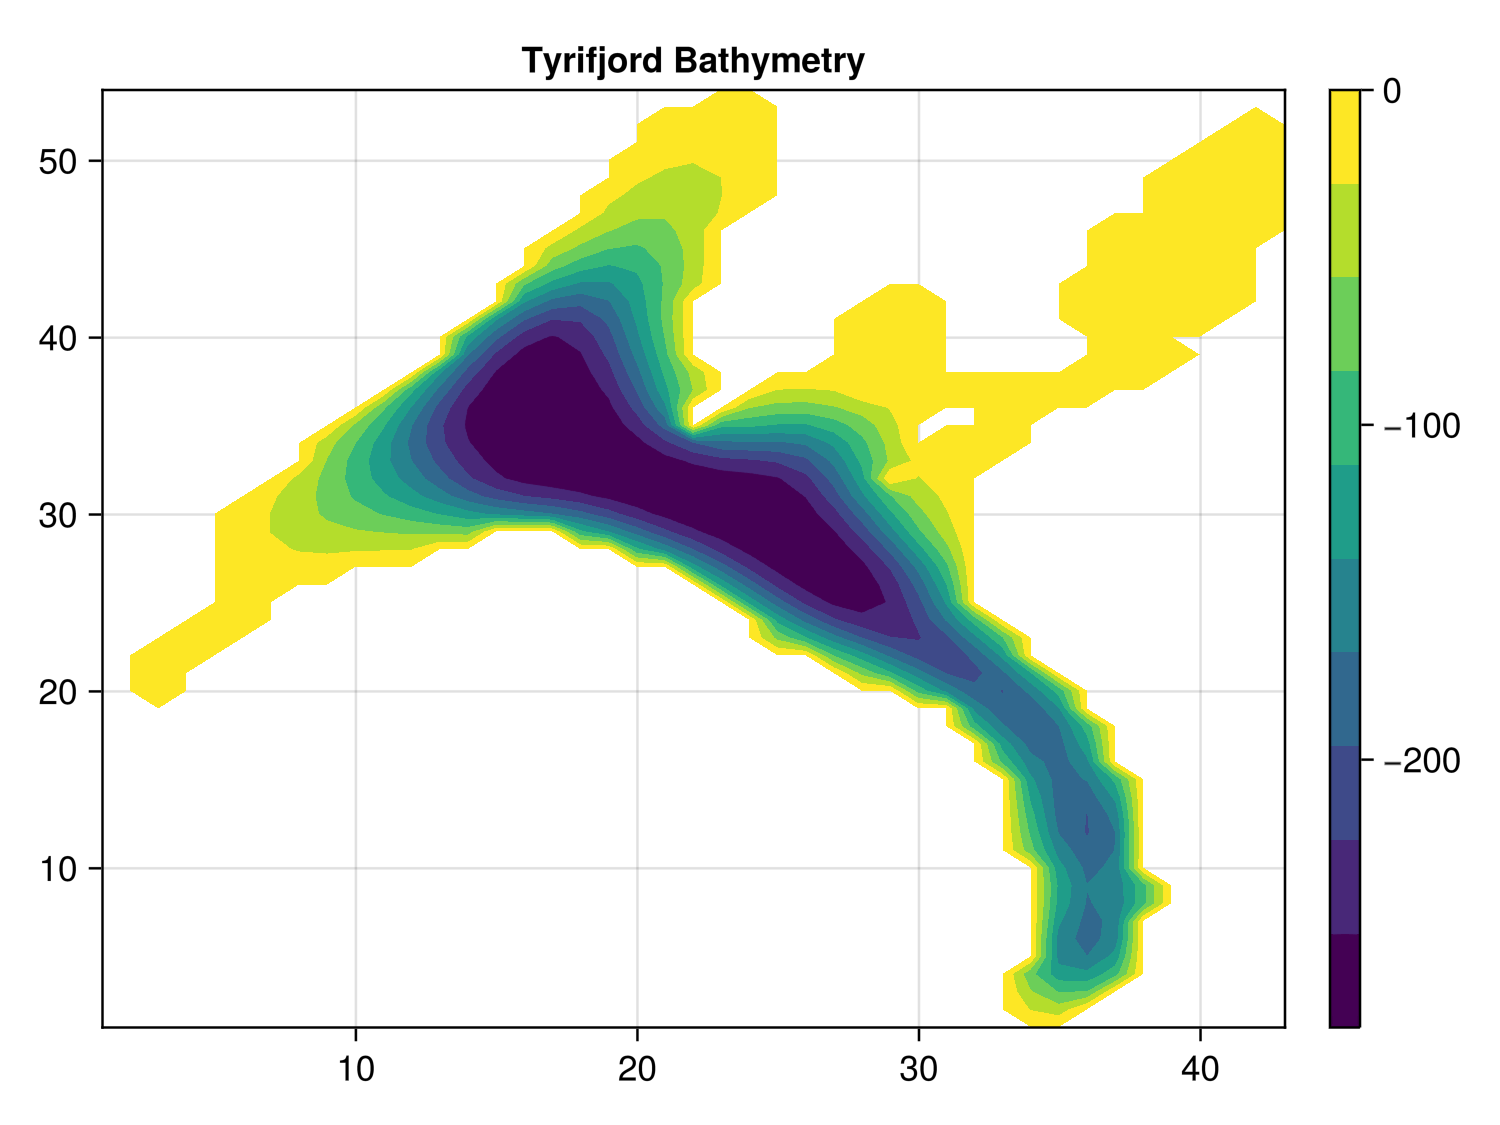

In [5]:
fig = Figure()
# Add a contour plot to the figure
ax = Axis(fig[1, 1], title = "Bathymetry")
cf = contourf!(ax, rotr90(m, 1))
                # levels = range(-200, 0, length = 20),
                # extendhigh = :magenta)


Colorbar(fig[1, 2], cf)

# Customize the plot
ax.title = "Tyrifjord Bathymetry"

# Display the figure
fig

In [6]:
@save "bathymetry_Tyrifjord.jld2" "depth" = rotr90(m, 1)

In [45]:
?@save

```
@save filename var1 [var2 ...]
@save filename {compress=true} var1 name2=var2
```

Write one or more variables `var1,...` from the current scope to a JLD2 file `filename`.

For interactive use you can save all variables in the current module's global scope using `@save filename`. More permanent code should prefer the explicit form to avoid saving unwanted variables.

# Example

To save the string `hello` and array `xs` to the JLD2 file example.jld2:

```
hello = "world"
xs = [1,2,3]
@save "example.jld2" hello xs
```

For passing options to the saving command use {}

```
@save "example.jld2" {compress=true} hello xs
```

For saving variables under a different name use regular assignment syntax

```
@save "example.jld2" greeting=hello xarray = xs
```
